In [83]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [84]:
# Carregar o dataset (requer internet)
df = sns.load_dataset("penguins").dropna()

# Traduções
df = df.rename(columns={
    'species': 'especie',
    'island': 'ilha',
    'bill_length_mm': 'comprimento_bico_mm',
    'bill_depth_mm': 'largura_bico_mm',
    'flipper_length_mm': 'comprimento_nadadeira_mm',
    'body_mass_g': 'massa_corporal_g',
    'sex': 'sexo'
})

df['especie'] = df['especie'].replace({'Adelie': 'Adélia', 'Chinstrap': 'Barbicha', 'Gentoo': 'Gentoo'})
df['sexo'] = df['sexo'].replace({'Male': 'Macho', 'Female': 'Fêmea'})

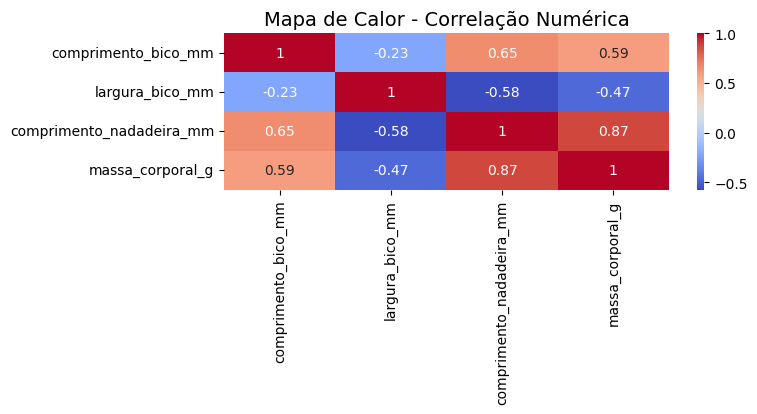

In [85]:
# Gráfico 1 - Heatmap
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Mapa de Calor - Correlação Numérica", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🔥 Mapa de Calor - Correlação Numérica

O **Mapa de Calor (Heatmap)** é uma forma visual de representar a **correlação entre variáveis numéricas** de um dataset. Ele nos ajuda a identificar relações fortes, fracas ou inexistentes entre diferentes variáveis de forma rápida e intuitiva.

---

## 🧭 Entendendo os Eixos

- **Eixo X e Eixo Y** contêm os mesmos nomes das **variáveis numéricas** do dataset:
  - `comprimento_bico_mm`
  - `largura_bico_mm`
  - `comprimento_nadadeira_mm`
  - `massa_corporal_g`

Esses nomes se cruzam para formar uma **matriz de correlação**, onde cada célula representa a correlação entre duas variáveis específicas.

---

## 🎯 O que é correlação?

- Correlação é um número entre **-1 e 1** que indica **força e direção da relação linear** entre duas variáveis:

| Valor | Interpretação |
|-------|----------------|
| `+1`  | Correlação positiva perfeita 🔼📈 |
| `0`   | Sem correlação ❌ |
| `-1`  | Correlação negativa perfeita 🔽📉 |

---

## 🧠 Interpretando o gráfico

- **Cores**:
  - 🔴 Vermelho forte = correlação positiva alta
  - 🔵 Azul escuro = correlação negativa alta
  - ⚪ Branco = correlação próxima de zero (sem relação)

- **Células diagonais (de cima à esquerda até embaixo à direita)** são sempre `1`, pois cada variável está sendo correlacionada com ela mesma.

---

## 🔍 Exemplos práticos do gráfico

| Variável A                  | Variável B                | Correlação | Interpretação |
|----------------------------|---------------------------|------------|-----------------------------|
| `comprimento_nadadeira_mm` | `massa_corporal_g`        | `0.87`     | Forte correlação positiva – quanto maior a nadadeira, maior a massa 🐧 |
| `largura_bico_mm`          | `comprimento_nadadeira_mm`| `-0.58`    | Correlação negativa – nadadeiras maiores tendem a aparecer com bicos mais estreitos |
| `comprimento_bico_mm`      | `largura_bico_mm`         | `-0.23`    | Correlação fraca – pouca relação entre essas variáveis |

---

## ✅ Para que serve um heatmap de correlação?

| Utilidade 💡 | Explicação |
|-------------|------------|
| 🧪 Análise exploratória | Entender como as variáveis se relacionam entre si |
| 🎯 Seleção de features | Identificar colinearidade para melhorar modelos |
| 🧱 Engenharia de atributos | Criar novas variáveis com base em relações existentes |
| ⚠️ Detecção de multicolinearidade | Evitar incluir variáveis altamente correlacionadas em modelos lineares |

---

## 📝 Conclusão

O mapa de calor de correlação é uma ferramenta **essencial para qualquer cientista de dados**. Ele mostra, de forma clara e visual, **quais variáveis se influenciam mutuamente** e em que grau.

- 🔎 Use-o sempre que estiver começando a explorar um dataset
- 📊 Avalie padrões ocultos e estruturas internas
- 🧠 Tome decisões mais inteligentes na modelagem

---

🎓 Dica final:
> Quando variáveis têm **correlação forte (> 0.8 ou < -0.8)**, pense em manter apenas uma delas em modelos lineares, ou usar técnicas como PCA para reduzir dimensionalidade.


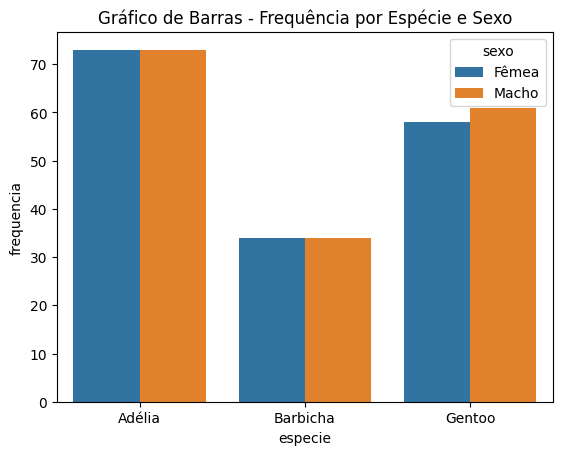

In [86]:
# Gráfico 2 - Barplot - Gráfico de Barras de Frequência por Sexo e Espécie
freq = df.groupby(['especie', 'sexo']).size().reset_index(name='frequencia')
sns.barplot(data=freq, x='especie', y='frequencia', hue='sexo')
plt.title("Gráfico de Barras - Frequência por Espécie e Sexo")
plt.show()

# 📊 Gráfico de Barras - Frequência por Espécie e Sexo

Este gráfico é um **gráfico de barras agrupado**, que mostra a **frequência (quantidade de registros)** de pinguins separados por **espécie** e **sexo**.

---

## 🧭 Estrutura do Gráfico

### 📌 Eixo X (Horizontal)
- Representa a variável **`especie`**.
- Possui 3 categorias:
  - **Adélia**
  - **Barbicha**
  - **Gentoo**
- Para cada espécie, temos **duas barras agrupadas**, representando os **sexos**:
  - 🔵 Azul: **Fêmea**
  - 🟠 Laranja: **Macho**

### 📌 Eixo Y (Vertical)
- Representa a **frequência** (contagem de indivíduos).
- Os valores mostram **quantos indivíduos de cada sexo** existem para cada espécie.

---

## 🔍 Interpretação Visual

| Espécie   | Fêmeas | Machos | Observações |
|-----------|--------|--------|-------------|
| Adélia    | ~73    | ~73    | Distribuição **igual** entre sexos |
| Barbicha  | ~34    | ~34    | Também bem **equilibrado** |
| Gentoo    | ~58    | ~61    | Leve **predomínio de machos** |

🧠 **Insights:**
- ✅ Boa representação para **comparar proporções entre subgrupos**.
- ✅ Mostra **distribuição uniforme** de sexo em algumas espécies.
- 🔍 Permite ver se existe **desequilíbrio de gênero** em algum grupo.

---

## 🧰 Para que serve esse tipo de gráfico?

| Finalidade                          | Explicação                                                                 |
|------------------------------------|----------------------------------------------------------------------------|
| Comparar categorias                | Comparar **quantidades** entre espécies e sexos simultaneamente            |
| Analisar proporções                | Ver se os grupos têm distribuição equilibrada                              |
| Detectar padrões demográficos      | Identificar se existe predominância de sexo em alguma espécie             |
| Visualização rápida de contagens   | Facilita a leitura e comunicação em relatórios e dashboards                |

---

## 📈 Quando usar gráficos de barras agrupadas?

| Quando usar 📅                  | Por quê? |
|-------------------------------|----------|
| 🧪 Análise exploratória        | Visualizar distribuição de grupos em dados categóricos |
| 🧑‍🏫 Apresentações educativas  | Muito intuitivo para públicos diversos |
| 📊 Relatórios gerenciais       | Excelente para mostrar proporções entre subgrupos |

---

## 📝 Conclusão

- O gráfico de barras agrupadas é uma **ferramenta poderosa e simples** para comparar **duas variáveis categóricas simultaneamente**.
- Neste exemplo, entendemos **como os pinguins estão distribuídos por espécie e sexo**, revelando **padrões úteis para análise biológica, estatística e até para alimentar modelos preditivos**.

> 🔍 Dica bônus: você pode calcular a **proporção** de machos/fêmeas por espécie com esse gráfico ou usar versões percentuais para análises mais refinadas!



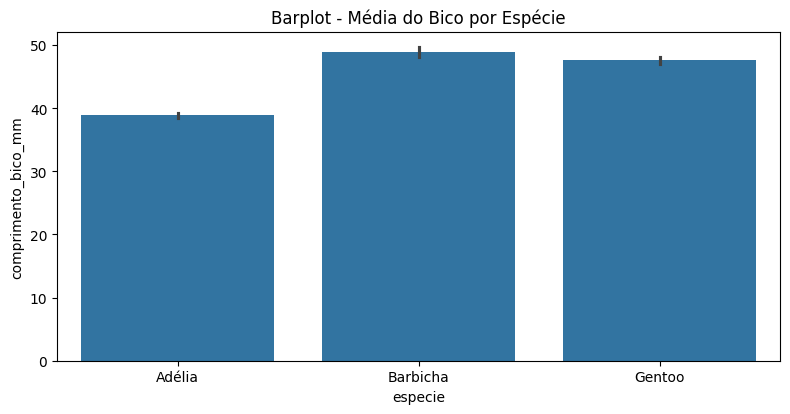

In [87]:
# Gráfico 3 - Barplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=df, x='especie', y='comprimento_bico_mm', ax=ax)
ax.set_title("Barplot - Média do Bico por Espécie")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📊 Barplot - Média do Bico por Espécie

O gráfico de barras (**Barplot**) é utilizado para **comparar valores agregados (como médias)** entre diferentes categorias. Neste gráfico, estamos analisando a **média do comprimento do bico (em mm)** de três espécies de pinguins.

---

## 🧭 Eixos do gráfico

- **Eixo X (`especie`)**: apresenta as **categorias das espécies de pinguins**:
  - Adélia
  - Barbicha
  - Gentoo

- **Eixo Y (`comprimento_bico_mm`)**: indica a **média do comprimento do bico em milímetros** para cada espécie. Os valores variam de aproximadamente **39 mm a 49 mm**.

---

## 📏 Interpretação das Barras

- **Altura das Barras**: representa a **média do comprimento do bico** para cada espécie.
  - 🟦 Adélia: menor média (~39 mm)
  - 🟦 Barbicha: maior média (~49 mm)
  - 🟦 Gentoo: média próxima à da Barbicha (~48 mm)

- **Barras verticais pretas no topo**: são chamadas de **"intervalos de confiança"** ou **"barras de erro"**.
  - Elas indicam a **incerteza estatística** sobre a média.
  - Quanto **menor** a barra de erro, **mais precisa** é a média.
  - Se as barras de erro **não se sobrepõem**, é um indicativo visual de que as diferenças podem ser estatisticamente significativas.

---

## 🧠 Como interpretar

- Esse gráfico **responde à pergunta**: _"Qual espécie de pinguim tem o bico mais longo, em média?"_ 🐧📏
- Ele **não mostra a dispersão dos dados** (para isso, usamos boxplot, violinplot etc).
- Ideal para **comparações diretas** de médias entre grupos.

---

## ✅ Para que serve um Barplot?

| Objetivo | Benefício |
|---------|-----------|
| 📐 Comparar valores médios | Visualmente simples e direto |
| 🔍 Observar diferenças entre grupos | Foco em categorias distintas |
| 🧪 Mostrar variação média com erro | Interpretação estatística clara |

---

## 📝 Conclusão

Este gráfico nos mostra que:
- A **espécie Barbicha** possui o **maior comprimento médio de bico**.
- A **espécie Adélia** tem o **menor comprimento médio**.
- As **barras de erro** ajudam a verificar a confiabilidade dessas médias.

Use gráficos de barras quando quiser:
- Comparar valores agregados 📊
- Mostrar médias com intervalos de confiança 📏
- Explicar resultados de agrupamentos estatísticos 👨‍🔬

---

🧠 Dica: Combine o barplot com outros gráficos (boxplot, violinplot) para entender melhor a **distribuição completa dos dados**, e não só a média.


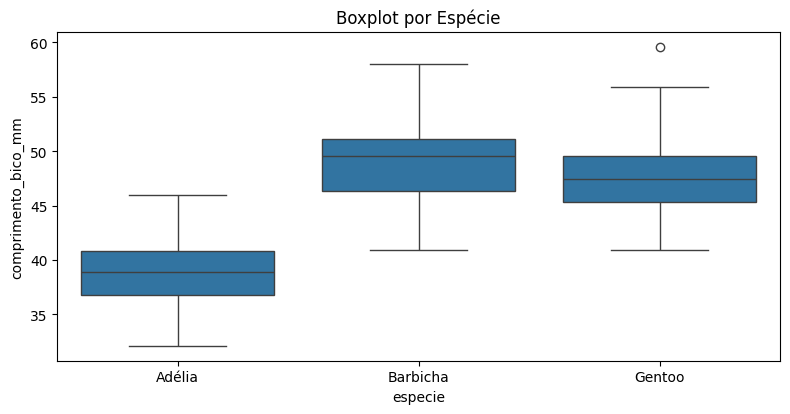

In [88]:
# Gráfico 4 - Boxplot por Espécie
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='especie', y='comprimento_bico_mm', ax=ax)
ax.set_title("Boxplot por Espécie")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📦 Boxplot por Espécie - Comprimento do Bico

Este gráfico é um **boxplot** (ou gráfico de caixa), muito usado na **análise exploratória de dados** para entender **distribuições**, **tendências centrais** e **dispersão**. Ele é excelente para comparar **grupos diferentes**, neste caso, as **espécies de pinguins**.

---

## 🔍 O que mostra esse gráfico?

- **Eixo X (`especie`)**: mostra as três espécies de pinguins no dataset (`Adélia`, `Barbicha`, `Gentoo`).
- **Eixo Y (`comprimento_bico_mm`)**: mostra os valores do comprimento do bico em milímetros.
- Cada "caixa" representa a **distribuição estatística** dessa variável para cada espécie.

---

## 🧠 Como interpretar um boxplot?

Para cada espécie:

- **📦 Caixa (box)**: vai do **1º quartil (Q1 - 25%)** até o **3º quartil (Q3 - 75%)** → mostra onde está a maior parte dos dados.
- **📍 Linha no meio da caixa**: é a **mediana (Q2 - 50%)** → o valor central da distribuição.
- **📏 Bigodes (linhas que saem da caixa)**: vão até os valores máximos e mínimos **dentro de 1,5x o intervalo interquartil (IQR)**.
- **⚠️ Pontos fora dos bigodes (como um círculo acima da Gentoo)**: são **outliers**, ou seja, valores que estão fora do padrão da maioria.

---

## 🧪 Interpretação por espécie

### 🐧 Adélia:
- Mediana perto de **38 mm**.
- Caixa estreita → menor variação nos dados.
- Bigodes indicam distribuição mais compacta.
- Bicos mais curtos no geral.

### 🐧 Barbicha:
- Mediana em torno de **50 mm**.
- Caixa mais larga → maior dispersão.
- Alguns valores altos → comprimento de bico mais variável.

### 🐧 Gentoo:
- Mediana também próxima de **48 mm**.
- Um **outlier visível acima de 59 mm**.
- Caixa indica boa consistência, mas há mais variação que na Adélia.

---

## 📌 Para que serve o boxplot?

| Objetivo | Explicação |
|----------|------------|
| 📏 Comparar distribuições | Permite ver facilmente qual grupo tem valores maiores ou menores |
| 📐 Avaliar dispersão | O tamanho da caixa indica o grau de variação dos dados |
| 📍 Observar tendência central | A linha da mediana mostra onde está o "meio" dos dados |
| ⚠️ Identificar outliers | Pontos fora dos bigodes são valores extremos (potenciais erros ou dados raros) |

---

## ✅ Conclusão

Este boxplot mostra de forma clara e concisa:

- Que as espécies têm **comprimentos de bico diferentes**;
- Que a espécie `Adélia` tem bicos menores e menos variabilidade;
- Que a `Barbicha` apresenta **maior dispersão**;
- E que a `Gentoo` tem **outliers** a serem analisados com atenção.

Use boxplots sempre que quiser **comparar a distribuição de uma variável numérica entre grupos distintos**!


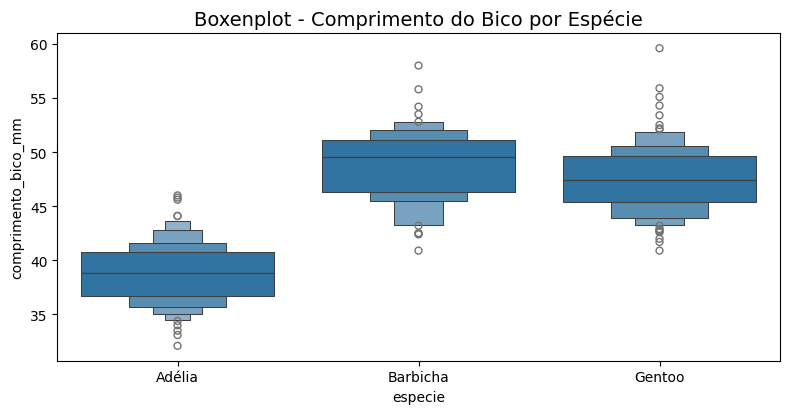

In [89]:
# Gráfico 5 – Boxenplot - Comprimento do Bico por Espécie
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxenplot(data=df, x='especie', y='comprimento_bico_mm', ax=ax)
ax.set_title("Boxenplot - Comprimento do Bico por Espécie", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📊 Boxenplot – Comprimento do Bico por Espécie

O **Boxenplot** (também chamado de "letter-value plot") é uma evolução do boxplot tradicional, projetado para mostrar a **distribuição detalhada** de **variáveis contínuas** especialmente quando há **muitos dados** e a distribuição não é simétrica.

---

## 🧭 Eixos do Gráfico

- **Eixo X**: `especie` – Cada categoria representa uma **espécie de pinguim**: *Adélia*, *Barbicha* e *Gentoo*.
- **Eixo Y**: `comprimento_bico_mm` – Representa o **comprimento do bico em milímetros**.

---

## 📦 Componentes do Boxenplot

Cada “bloco” representa uma **faixa percentil** da distribuição:

- 🔹 **Linha central** (mais grossa): Mediana (50% dos dados estão abaixo e 50% acima).
- 🔹 **Blocos maiores centrais**: Intervalos entre o 1º e o 3º quartil (25% a 75%).
- 🔹 **Blocos adicionais acima/abaixo**: Representam subdivisões mais profundas dos dados (ex: 12.5%, 6.25% etc).
- ⚪ **Círculos fora da área azul**: Outliers (valores atípicos).

> Esse gráfico vai além do boxplot tradicional, revelando com mais clareza os extremos e caudas da distribuição. 🎯

---

## 🧠 Como Interpretar?

| Elemento             | Significado                                                                 |
|----------------------|------------------------------------------------------------------------------|
| 🔷 Blocos escuros     | Onde está **a maior densidade de dados** (centro da distribuição)           |
| 🔹 Blocos claros      | Representam áreas mais raras, como caudas                                  |
| 📏 Altura da faixa    | Indica a amplitude dos dados naquele percentil                             |
| ⚪ Outliers            | Valores que fogem da tendência principal (extremos)                        |

---

## 📍 Observações por Espécie

- **Adélia**: Bicos mais curtos, menor variabilidade, mais outliers abaixo de 35mm.
- **Barbicha**: Bicos mais longos, ampla dispersão e vários outliers acima de 55mm.
- **Gentoo**: Intermediária entre as outras duas, mas com leve tendência à direita (bicos mais longos).

---

## 🎯 Para que Serve?

| Aplicação 🎯               | Utilidade 💡                                                                 |
|---------------------------|------------------------------------------------------------------------------|
| 📊 Análise de distribuições| Revela nuances da distribuição que o boxplot tradicional não mostra         |
| 🔎 Identificar caudas      | Facilita encontrar padrões em extremos da distribuição                     |
| 📐 Comparação entre grupos | Compara diferentes grupos de forma mais informativa que boxplots simples    |

---

## 📘 Dica Extra

O boxenplot é ideal quando:

- Você tem **grande volume de dados**.
- Deseja explorar **distribuições assimétricas ou com caudas longas**.
- Quer **detalhes percentílicos mais profundos**.

---

## ✅ Conclusão

Use o **boxenplot** para obter **uma visão mais rica e detalhada** da distribuição de uma variável contínua por categorias. Ele é mais informativo que o boxplot tradicional quando há muitos dados, permitindo:

- 📊 Ver onde os dados se concentram.
- 📉 Analisar caudas da distribuição.
- 🔍 Investigar a simetria dos dados.

> ✨ Uma ferramenta essencial para análises exploratórias profundas e precisas!


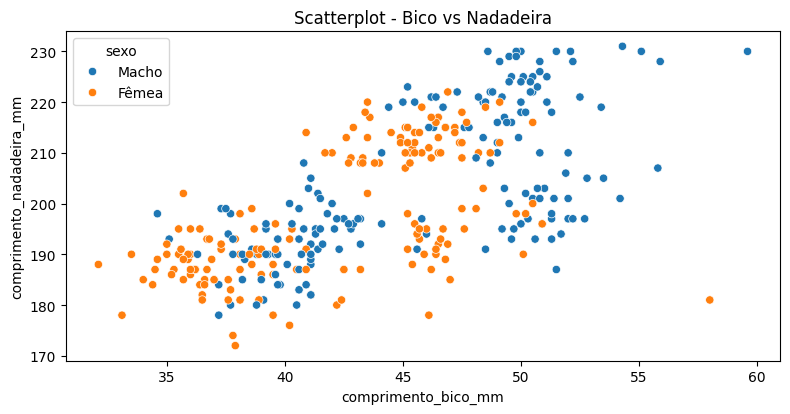

In [90]:
# Gráfico 6 - Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, x='comprimento_bico_mm', y='comprimento_nadadeira_mm', hue='sexo', ax=ax)
ax.set_title("Scatterplot - Bico vs Nadadeira")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🔵 Scatterplot - Bico vs Nadadeira

O **scatterplot** (ou gráfico de dispersão) é um dos gráficos mais importantes da análise exploratória de dados. Ele mostra como **duas variáveis numéricas se relacionam entre si**, ponto a ponto. Cada ponto representa uma **observação individual** do conjunto de dados.

---

## 🧭 Eixos do gráfico

- **Eixo X (`comprimento_bico_mm`)**: mostra o valor do comprimento do bico de cada pinguim em milímetros. Os valores vão de aproximadamente **30 mm até 60 mm**.
- **Eixo Y (`comprimento_nadadeira_mm`)**: mostra o comprimento da nadadeira de cada pinguim, também em milímetros. Os valores variam entre **170 mm e 230 mm**.

---

## 🟠 O que representa cada ponto?

Cada **ponto no gráfico** representa um pinguim. O posicionamento é definido por:

- 📍 A posição horizontal (X): comprimento do bico.
- 📍 A posição vertical (Y): comprimento da nadadeira.
- 🎨 A cor do ponto: representa o **sexo do pinguim**:
  - Azul → `Macho`
  - Laranja → `Fêmea`

---

## 🔍 O que podemos observar nesse gráfico?

### 📈 1. Relação Positiva entre as Variáveis
A maioria dos pontos segue uma **tendência ascendente**: quanto maior o comprimento do bico, maior tende a ser o comprimento da nadadeira. Isso sugere uma **correlação positiva** entre as duas variáveis.

### 👫 2. Diferença entre Machos e Fêmeas
A separação por cores permite observar que:
- Pinguins machos (azuis) tendem a ter bicos e nadadeiras **ligeiramente maiores** do que as fêmeas (laranjas).
- Há uma certa **sobreposição**, mas os grupos apresentam **tendências diferentes**.

### 🎯 3. Distribuição dos Dados
Os dados estão bem distribuídos, com poucas observações nos extremos (valores muito baixos ou muito altos). Existe um **aglomerado principal** entre:
- **Comprimento do bico:** 35 mm a 50 mm
- **Comprimento da nadadeira:** 180 mm a 220 mm

---

## 📌 Para que serve um scatterplot?

| Objetivo | Benefício |
|----------|-----------|
| 📊 Visualizar relação entre duas variáveis numéricas | Identifica padrões de correlação e agrupamentos |
| 🔎 Detectar tendências lineares ou não | Verifica se os dados crescem juntos, de forma linear, exponencial etc. |
| 🚨 Detectar outliers | Pontos isolados fora da massa principal de dados podem indicar valores extremos |
| 🟦 Comparar subgrupos com cores | Permite análise de subcategorias, como sexo, espécie, etc. |

---

## ✅ Conclusão

O scatterplot é excelente para **investigar relações entre variáveis contínuas**. Neste exemplo, ele revela uma correlação entre **comprimento do bico e da nadadeira**, além de mostrar **diferenças por sexo**. Ele é essencial em qualquer análise exploratória quando queremos **entender relações estruturais entre características numéricas**.

Use scatterplots sempre que quiser responder a perguntas como:
- “Essas duas variáveis crescem juntas?” 📈
- “Os grupos se comportam de forma diferente?” 🎨
- “Há padrões ou exceções?” 🔍


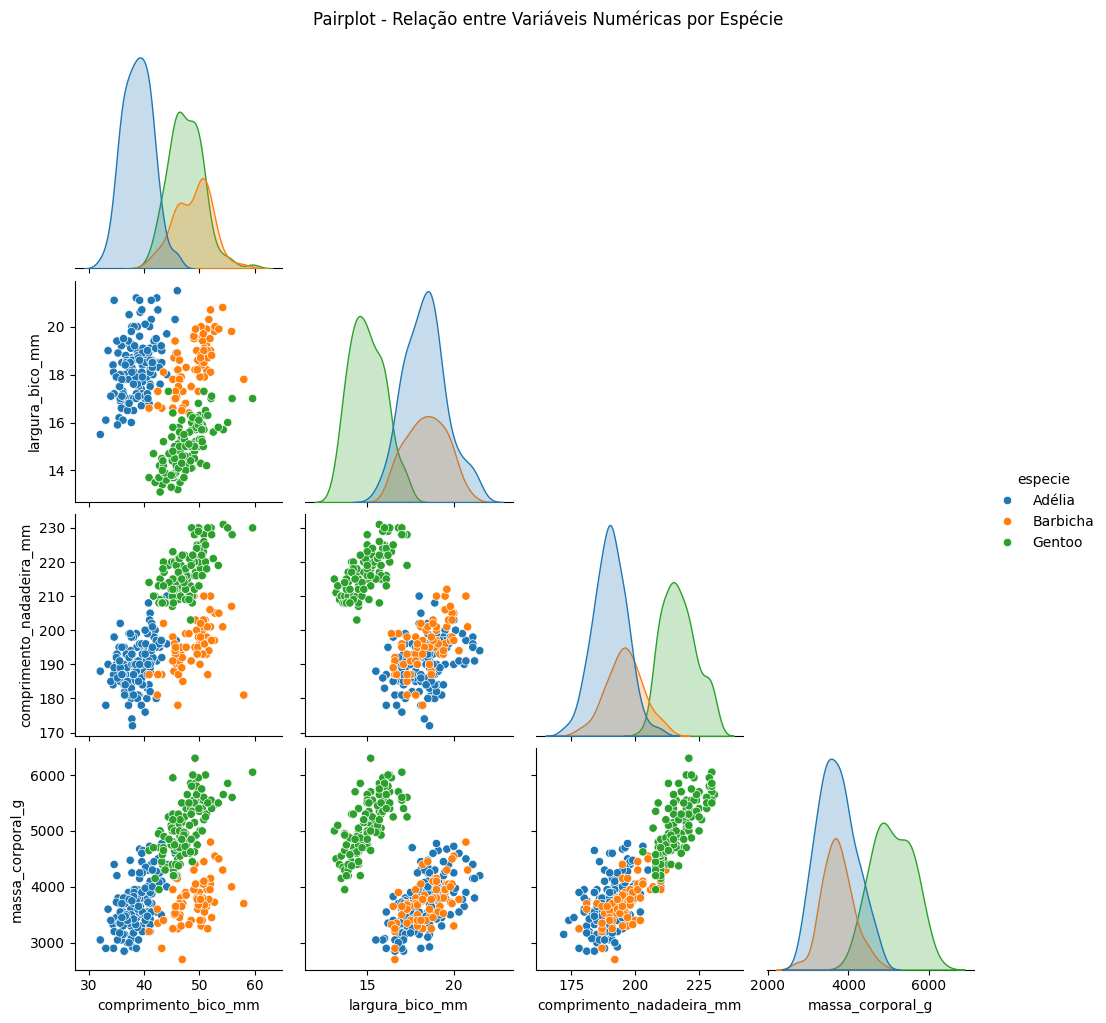

In [91]:
# Gráfico 7 - Pairplot (Gráfico de Pares)
sns.pairplot(df, hue='especie', diag_kind='kde', corner=True)
plt.suptitle("Pairplot - Relação entre Variáveis Numéricas por Espécie", y=1.02)
plt.show()

# 🔗 Pairplot – Relação entre Variáveis Numéricas por Espécie

O **pairplot** (também conhecido como *scatterplot matrix*) é uma ferramenta poderosa de **análise exploratória de dados multivariados**. Ele mostra **todas as combinações possíveis de pares de variáveis numéricas**, facilitando a identificação de padrões, relações lineares, correlações e agrupamentos por categorias.

---

## 🧭 Como Ler o Pairplot

### 🔹 Eixos X e Y

Cada linha e coluna representam uma variável **numérica contínua**. Neste gráfico:

- `comprimento_bico_mm`
- `largura_bico_mm`
- `comprimento_nadadeira_mm`
- `massa_corporal_g`

> O eixo **X** de cada gráfico mostra uma das variáveis, enquanto o eixo **Y** mostra outra variável, criando **todas as combinações possíveis entre elas**.

---

## 🧩 Interpretação dos Elementos

| Parte do Gráfico                              | Significado                                                                 |
|----------------------------------------------|------------------------------------------------------------------------------|
| 🎯 Diagonais                                  | Distribuição univariada (*KDE* ou histograma) de cada variável              |
| 🔵🟠🟢 Cores                                   | Representam as diferentes **espécies** (*Adélia, Barbicha, Gentoo*)         |
| 🔳 Gráficos fora da diagonal                   | Scatterplots bivariados (variável X vs variável Y) com pontos por espécie   |
| 📈 Padrões diagonais nos scatterplots         | Indicam **correlação positiva ou negativa** entre as variáveis              |
| 🧮 Densidade sobre a diagonal                  | Mostra a distribuição da variável em cada grupo                             |

---

## 🔍 O que o gráfico revela?

### 1. **Distribuição individual por espécie (diagonal)**
- O KDE mostra como a variável está distribuída para cada espécie.
  - Por exemplo: `massa_corporal_g` tem maior média para a espécie *Gentoo* (verde).

### 2. **Relacionamentos entre variáveis**
- Há forte correlação positiva entre:
  - `comprimento_nadadeira_mm` e `massa_corporal_g`
  - `comprimento_bico_mm` e `massa_corporal_g`
- Algumas variáveis, como `largura_bico_mm`, têm distribuição bem diferente entre espécies, o que pode ser útil para classificação.

### 3. **Agrupamento de espécies**
- As espécies estão **bem separadas visualmente**, sugerindo que há uma base sólida para **modelos de classificação supervisionada**.

---

## 🎯 Quando usar o Pairplot?

| Situação 💡                                 | Utilidade 🎯                                                       |
|--------------------------------------------|--------------------------------------------------------------------|
| 🧪 Análise exploratória (EDA)               | Visualiza todas as combinações entre variáveis numéricas           |
| 🧬 Identificação de correlações              | Verifica possíveis colinearidades ou dependências entre atributos  |
| 📊 Comparação entre grupos                  | Avalia como os grupos (ex: espécies) se distribuem nas variáveis   |
| 🧠 Insight para modelagem                   | Descobre quais variáveis são mais relevantes para modelos preditivos |

---

## ✅ Conclusão

O **pairplot** é essencial para:

- 📉 Detectar relações entre variáveis.
- 🧠 Visualizar a separação entre classes.
- 🔬 Entender melhor a estrutura dos dados.

> ✨ Uma ferramenta visual indispensável para quem trabalha com **classificação, clustering** e **modelos supervisionados**.

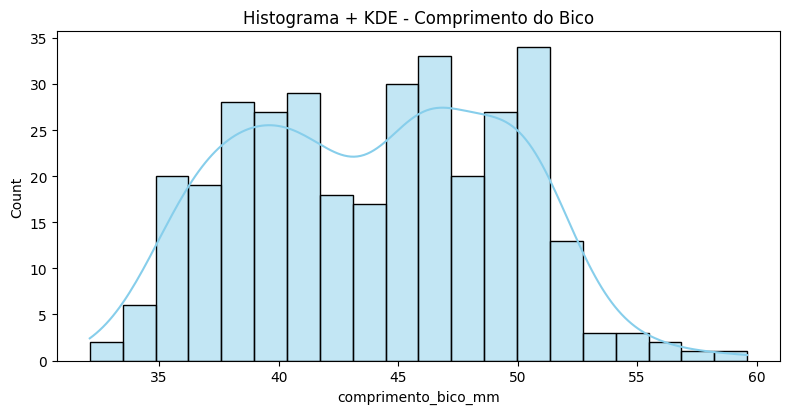

In [92]:
# Gráfico 8 - Histograma + KDE
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['comprimento_bico_mm'], kde=True, bins=20, ax=ax, color='skyblue')
ax.set_title("Histograma + KDE - Comprimento do Bico")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📊 Histograma + KDE - Comprimento do Bico

Este gráfico combina **dois tipos de visualização** fundamentais em análise exploratória:

---

## ✅ O que o gráfico mostra?

1. **🔷 Histograma (barras em azul claro)**  
   - Representa **quantos pinguins** possuem o comprimento do bico dentro de **intervalos específicos**.
   - Cada **barra** cobre uma **faixa de valores no eixo X** (por exemplo, de 40 a 42 mm).
   - A **altura da barra (eixo Y)** mostra **a quantidade (frequência)** de pinguins naquela faixa.
   - Ideal para visualizar a **distribuição** e a **frequência** de valores em grupos discretos.

2. **📈 KDE (linha suavizada)**  
   - KDE significa _Kernel Density Estimation_, ou **Estimativa de Densidade por Núcleo**.
   - Representa uma **versão suavizada** do histograma, como se fosse uma curva de tendência.
   - **Quanto mais alta a curva**, **maior a densidade de dados** naquela região.
   - Ajuda a visualizar **tendências e padrões** que o histograma sozinho pode não mostrar.

---

## 📏 Eixo X: `comprimento_bico_mm`

- Mostra os **valores de comprimento do bico dos pinguins**, geralmente variando de **30 mm a 60 mm**.
- Cada valor representa **um possível comprimento real** de bico em milímetros (mm).
- Os **intervalos das barras** (bins) dividem esses valores em **faixas**, como 32–34 mm, 34–36 mm, etc.

---

## 📊 Eixo Y: `Count`

- Indica o **número de observações (pinguins)** em cada faixa de comprimento (histograma).
- Para a curva KDE, o eixo Y representa a **densidade relativa** (não é contagem exata), ou seja, **a probabilidade de ocorrência** dos valores.

---

## 🔍 Como interpretar visualmente?

### 🎯 Região central

- A maioria dos dados está concentrada entre **40 e 50 mm**.
- Isso é indicado pelas **barras mais altas** e também pelo **pico da curva KDE** nessa região.
- É onde o comprimento do bico é mais comum entre os pinguins analisados.

### 🗻 Picos da curva (modos)

- A KDE apresenta **dois picos**, indicando que os dados são **bimodais**.
- Isso sugere que podem existir **duas populações diferentes** no conjunto de dados — talvez duas espécies de pinguins com comprimentos de bico distintos.

### ➕ Cauda longa à direita

- A curva KDE se estende para a direita, com valores que vão até perto de **60 mm**.
- Isso é chamado de **assimetria positiva** ou **cauda à direita**.
- Indica que há **alguns pinguins com bicos mais longos** que o padrão geral.

### 🔻 Extremos (valores raros)

- Poucas barras aparecem abaixo de **35 mm** ou acima de **55 mm**.
- Essas áreas representam **valores menos comuns** de comprimento do bico — podem ser outliers ou espécies raras.

---

## 🧠 Para que serve esse tipo de gráfico?

| Objetivo | Explicação |
|----------|------------|
| 🧭 Entender a distribuição dos dados | Mostra como os valores se distribuem: simétricos, assimétricos, agrupados, dispersos |
| 🧬 Detectar padrões | Picos, caudas e forma geral revelam possíveis **agrupamentos naturais** |
| 🎯 Identificar outliers | Valores extremos aparecem como **barras isoladas** ou **caudas da KDE** |
| 📊 Comparar frequência e densidade | O histograma mostra **contagem exata**, a KDE mostra **densidade relativa** |

---

## 📌 Conclusão

Este gráfico é **essencial** em uma análise exploratória porque permite:

- Ver **quantas vezes** cada valor ocorre (barras);
- Entender **a forma geral da distribuição** (KDE);
- Detectar possíveis **anomalias ou múltiplas populações**;
- Apoiar **decisões de modelagem** — como transformação de dados, normalização e seleção de variáveis.

Use-o sempre que quiser **explorar a distribuição de uma variável numérica** de forma visual, clara e eficiente! ✅


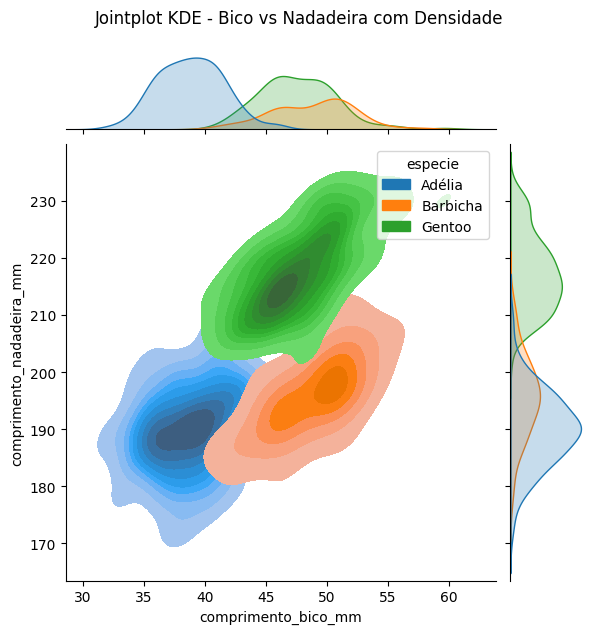

In [93]:
# Gráfico 9 - Jointplot - Relação entre duas variáveis com KDE
sns.jointplot(data=df, x='comprimento_bico_mm', y='comprimento_nadadeira_mm', hue='especie', kind='kde', fill=True)
plt.suptitle("Jointplot KDE - Bico vs Nadadeira com Densidade", y=1.05)
plt.show()

# 📊 Jointplot KDE - Bico vs Nadadeira com Densidade

O gráfico acima representa um **`jointplot` com KDE (Kernel Density Estimation)**, que combina **análises bivariadas e univariadas**. Ele mostra **a relação entre duas variáveis numéricas** (`comprimento_bico_mm` e `comprimento_nadadeira_mm`) com base na **densidade dos dados**, separados por espécie.

---

## 🔎 O que cada parte representa?

### 🔁 Gráfico Central (KDE 2D com contornos coloridos)
- O plano principal mostra a **distribuição conjunta** de duas variáveis:
  - **Eixo X** ➡️ `comprimento_bico_mm` (comprimento do bico em milímetros).
  - **Eixo Y** ➡️ `comprimento_nadadeira_mm` (comprimento da nadadeira em milímetros).
- As **áreas mais escuras** indicam **maior concentração de dados** (alta densidade).
- Cada cor representa uma **espécie de pinguim**:
  - 🔵 Azul: Adélia
  - 🟠 Laranja: Barbicha
  - 🟢 Verde: Gentoo

---

### 📈 Gráficos Marginais (Top e Lateral)
- **Topo:** Distribuição univariada do `comprimento_bico_mm` para cada espécie.
- **Direita:** Distribuição univariada do `comprimento_nadadeira_mm` para cada espécie.
- Esses gráficos são **KDEs (estimativas de densidade)** e ajudam a entender o padrão individual de cada variável, por espécie.

---

## 💡 Interpretação

| Espécie  | Comprimento do Bico | Comprimento da Nadadeira | Observações |
|----------|---------------------|---------------------------|-------------|
| Adélia   | Mais curto          | Menor                     | Pinguins menores em geral |
| Barbicha | Intermediário       | Intermediário             | Tamanho mediano |
| Gentoo   | Mais longo          | Maior                     | Pinguins maiores em geral |

➡️ As espécies estão bem separadas no espaço 2D, o que indica que essas duas variáveis ajudam a **diferenciar as espécies** com bastante clareza.

---

## 📦 Para que serve esse gráfico?

| Utilidade 📊                              | Explicação 💡                                                       |
|------------------------------------------|---------------------------------------------------------------------|
| Comparar 2 variáveis numéricas           | Avaliar a relação entre `comprimento_bico_mm` e `comprimento_nadadeira_mm` |
| Observar padrões de densidade            | Áreas escuras = onde há maior concentração de indivíduos            |
| Identificar clusters por categoria       | Cada espécie forma um grupo/coorte com formato e posição específicos |
| Visualizar distribuição univariada       | Gráficos marginais mostram o comportamento individual de cada variável |
| Separar classes visualmente              | Útil para classificação, segmentação ou clusterização de dados      |

---

## ✅ Quando usar um `jointplot` com KDE?

| Quando usar 🕵️‍♀️                       | Por quê? |
|----------------------------------------|---------|
| 📚 Na fase de análise exploratória     | Para investigar relações entre duas variáveis contínuas |
| 🔍 Para detectar clusters/grupos       | Muito bom para verificar se os dados se agrupam naturalmente |
| 🤖 Para problemas de classificação     | Ajuda a saber se as variáveis têm poder de separação entre classes |

---

## 📌 Conclusão

- O **jointplot com KDE** é uma ferramenta poderosa para **visualizar relações e densidades**.
- Permite **ver padrões escondidos** e entender a **distribuição e separação entre grupos**.
- Muito útil em **modelagem preditiva, clusterização e análise exploratória de dados**.

> 🌟 Esse tipo de gráfico te dá uma visão 2-em-1: a densidade bivariada + a univariada, facilitando muito as decisões analíticas!



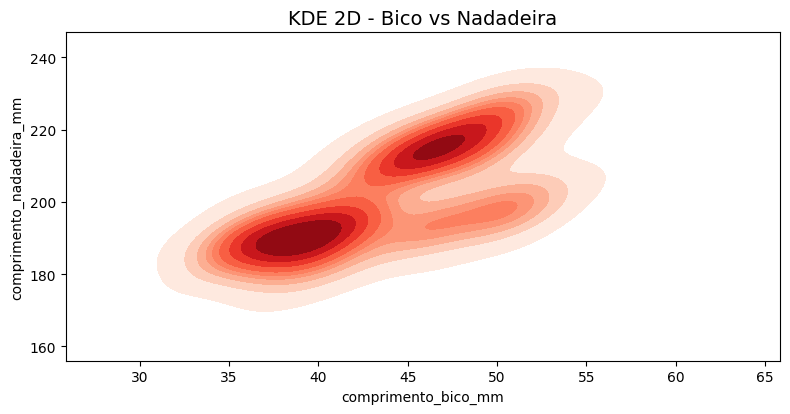

In [94]:
# Gráfico 10 – KDE 2D - Bico vs Nadadeira
fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(data=df, x='comprimento_bico_mm', y='comprimento_nadadeira_mm', ax=ax, fill=True, cmap='Reds')
ax.set_title("KDE 2D - Bico vs Nadadeira", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🔥 KDE 2D - Densidade de Pinguins (Comprimento do Bico vs Nadadeira)

O gráfico **KDE 2D (Kernel Density Estimation 2D)** é uma forma poderosa de visualizar **a distribuição conjunta de duas variáveis contínuas**. Ele nos ajuda a entender **onde os dados estão mais concentrados em um plano bidimensional**.

---

## 📊 Interpretação Geral

Este gráfico mostra a **distribuição conjunta** entre:

- **Eixo X**: `comprimento_bico_mm` → Comprimento do bico do pinguim (em milímetros)
- **Eixo Y**: `comprimento_nadadeira_mm` → Comprimento da nadadeira do pinguim (em milímetros)

Cada ponto no plano representa uma possível combinação entre comprimento do bico e nadadeira.

---

## 🔥 Como funciona a KDE 2D?

- Ela **estima a densidade de probabilidade** dos dados em um plano 2D.
- As **áreas mais escuras** indicam **maior concentração de dados** (regiões com muitos pinguins).
- As **áreas mais claras** indicam menor concentração.

A ideia é suavizar os pontos e revelar os **padrões de distribuição** — mesmo quando temos milhares de observações!

---

## 🧭 Entendendo os Eixos

| Eixo 📐 | Representação 📏 |
|--------|------------------|
| **X**  | Comprimento do bico (`mm`) - de 25 a 65 mm |
| **Y**  | Comprimento da nadadeira (`mm`) - de 160 a 240 mm |

Cada ponto possível nesse plano representa uma **combinação dessas duas variáveis**.

---

## 🌋 Interpretação das Cores (Contornos de Densidade)

| Cor 🟥 | Significado 🔍 |
|-------|-----------------|
| 🔴 Vermelho escuro | Altíssima densidade de pontos |
| 🟧 Vermelho médio | Densidade média |
| 🟨 Vermelho claro | Baixa densidade |

As **linhas de contorno** funcionam como um "mapa de calor": quanto mais escura e central a área, mais dados foram observados com aquelas combinações de comprimento.

---

## 🧠 O que podemos concluir?

- Existem pelo menos **duas grandes regiões de alta densidade**, o que sugere a existência de **duas populações distintas de pinguins**.
- Uma dessas concentrações está por volta de:
  - Bico: **35–40 mm**
  - Nadadeira: **175–190 mm**
- Outra concentração:
  - Bico: **45–50 mm**
  - Nadadeira: **210–220 mm**
- Isso pode indicar **diferenças de espécie, sexo ou outras características biológicas.**

---

## 📌 Para que serve esse gráfico?

| Aplicação 🔬 | Utilidade |
|--------------|-----------|
| 🧬 Análise de agrupamentos | Identificar **agrupamentos naturais** nos dados |
| 🧠 Detecção de padrões | Descobrir **relações não lineares** entre duas variáveis |
| 📉 Melhor que scatterplot | Quando há **muitos dados sobrepostos**, a KDE mostra densidades mesmo onde os pontos se escondem |
| 🎯 Comparar populações | Ver diferenças entre grupos com base em duas variáveis contínuas |

---

## ✅ Dica prática

> Se você estiver lidando com muitos dados e o **scatterplot fica ilegível**, use o **KDE 2D** para identificar **zonas de densidade** e compreender a **estrutura dos dados**.

---

## 💬 Resumo Final

O KDE 2D nos dá uma visão clara de onde os dados estão concentrados. Ele é perfeito para revelar **clusters ocultos**, **sobreposições difíceis de enxergar** e padrões **não evidentes em gráficos simples**.



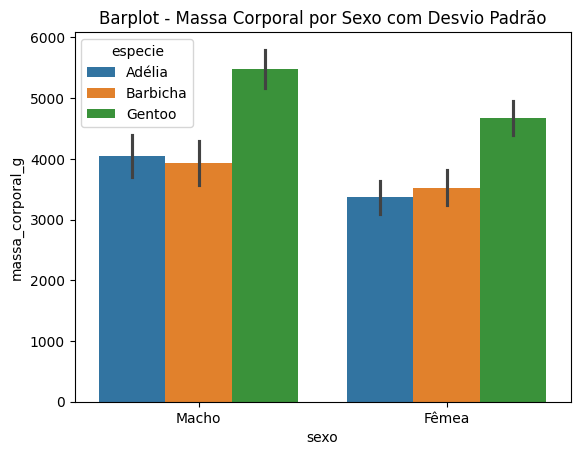

In [95]:
# Gráfico 11 - Barplot com Erro Padrão (desvio padrão)
sns.barplot(data=df, x='sexo', y='massa_corporal_g', hue='especie', ci='sd')
plt.title("Barplot - Massa Corporal por Sexo com Desvio Padrão")
plt.show()

# 📊 Barplot - Massa Corporal por Sexo com Desvio Padrão

Este gráfico é um **barplot com barras de erro (error bars)** e nos mostra a **média da massa corporal (em gramas)** dos pinguins por **sexo** e **espécie**, com **desvio padrão** indicando a variação dos dados.

---

## 🧭 Estrutura do Gráfico

### 📌 Eixo X (horizontal):
- Representa a variável **`sexo`**:
  - 🟦 Macho
  - 🟧 Fêmea
- Dentro de cada grupo de sexo, temos **barras coloridas** representando diferentes **espécies**:
  - Azul: **Adélia**
  - Laranja: **Barbicha**
  - Verde: **Gentoo**

### 📌 Eixo Y (vertical):
- Representa a **massa corporal média** dos pinguins, medida em **gramas (`massa_corporal_g`)**.
- Quanto maior a barra, maior o valor médio da massa corporal daquele grupo.

---

## 📌 Barras de Erro (Error Bars) 🧪

As **linhas pretas verticais** no topo de cada barra representam o **desvio padrão**, que indica o **grau de variação** em torno da média.

- Barras de erro **mais curtas** 👉 menor variação dos dados
- Barras de erro **mais longas** 👉 maior dispersão dos valores

---

## 🔍 Interpretação Detalhada

| Sexo   | Espécie  | Massa Corporal (g) aprox. | Observações |
|--------|----------|----------------------------|-------------|
| Macho  | Adélia   | ~4050                      | Massa média intermediária |
| Macho  | Barbicha | ~3950                      | Levemente menor que Adélia |
| Macho  | Gentoo   | ~5500                      | Muito mais pesada 💪 |
| Fêmea  | Adélia   | ~3400                      | Mais leve que os machos |
| Fêmea  | Barbicha | ~3550                      | Semelhante a Adélia |
| Fêmea  | Gentoo   | ~4700                      | A mais pesada entre as fêmeas |

✨ **O Gentoo é consistentemente mais pesado em ambos os sexos**, e **os machos geralmente pesam mais do que as fêmeas**.

---

## 🎯 Para que serve este tipo de gráfico?

| Utilidade                       | Explicação |
|--------------------------------|------------|
| 📉 Comparar médias              | Comparar valores médios entre grupos categóricos |
| 📏 Visualizar variabilidade     | Observar a consistência dos dados com barras de erro |
| 🔍 Analisar padrões             | Detectar diferenças de massa por sexo e espécie |
| 📊 Relatórios estatísticos      | Compreender tendências com suporte visual claro |

---

## 💡 Dicas para interpretação

- 🧠 Sempre observe **tanto o valor da média quanto o desvio padrão**: médias podem ser parecidas, mas a **variabilidade** pode mudar toda a interpretação.
- 🟢 Se houver **sobreposição de barras de erro**, a **diferença entre grupos pode não ser estatisticamente significativa**.
- 🧪 Pode ser combinado com testes estatísticos (ex: t-test, ANOVA) para confirmar essas diferenças.

---

## ✅ Conclusão

Este gráfico é ideal para representar **médias e sua incerteza**, sendo bastante usado em **ciências biológicas**, **experimentos com grupos distintos** e **comparações estatísticas visuais**. Ele permite **rápida compreensão de diferenças e consistência dos dados**, como neste caso, onde notamos que:

- O pinguim **Gentoo** tem maior massa corporal média em ambos os sexos 🐧⚖️
- Machos, em geral, são mais pesados que fêmeas.



In [96]:
# Gráfico 12 - Treemap (Mapa de Árvore com Plotly)
fig = px.treemap(df, path=['especie', 'sexo'], values='massa_corporal_g',
                 title='Treemap - Massa Corporal por Espécie e Sexo')
fig.show()

# 🌳 Treemap - Massa Corporal por Espécie e Sexo

O gráfico de **Treemap** (ou "mapa de árvore") é uma visualização que representa dados hierárquicos por meio de **retângulos aninhados**, onde:

- O **tamanho de cada retângulo** é proporcional a um valor numérico (neste caso, a **massa corporal total ou média** dos pinguins).
- A **hierarquia** é representada por **categorias agrupadas** (como **espécie** e **sexo**).
- As **cores** ajudam a diferenciar os grupos (espécies).

---

## 📌 O que cada parte representa?

### 📦 Retângulos

- Cada **retângulo** representa uma **combinação de espécie + sexo**.
- O **tamanho** do retângulo é proporcional à **massa corporal** total/média daquele grupo.

Exemplo:
- O **retângulo maior** (Gentoo - Macho ou Gentoo - Fêmea) mostra que essa categoria tem **maior massa corporal**.
- O **retângulo menor** (Barbicha - Fêmea) indica **menor massa**.

---

## 🧭 Interpretação dos dados

| Espécie  | Sexo   | Interpretação 📊 |
|----------|--------|------------------|
| **Gentoo** | Macho / Fêmea | Maior massa corporal entre todos os grupos 🟦 |
| **Adélia** | Macho / Fêmea | Massa intermediária 🟥 |
| **Barbicha** | Macho / Fêmea | Menor massa corporal 🟩 |

- Dentro de cada **espécie**, os sexos são subdivididos, o que permite **comparações intraespécie** (Macho x Fêmea).
- Também podemos fazer **comparações entre espécies**, observando os **tamanhos relativos dos blocos**.

---

## 📌 Vantagens do Treemap

| 🔍 Utilidade | ✔️ Explicação |
|-------------|--------------|
| 📐 Comparar proporções | Mostra como diferentes categorias se comparam entre si em termos de massa |
| 🔄 Visualização hierárquica | Permite ver a distribuição de um valor dentro de subgrupos |
| 🌈 Simples e intuitivo | Muito visual e direto para públicos não técnicos |
| 🎨 Ótimo para dashboards | Usado para resumir muitos dados rapidamente |

---

## 🎯 Quando usar?

- Quando você quer **comparar proporções entre diferentes grupos e subgrupos**.
- Quando tem uma estrutura **hierárquica** nos dados (ex: Categoria → Subcategoria).
- Para **resumir dados agregados** em relatórios e dashboards.

---

## 💡 Dicas de leitura

- ➕ Maior área do retângulo = **maior valor numérico (massa)**
- 🎨 Cor diferente = **grupo distinto (espécie)**
- 🔠 Texto dentro do retângulo = **categorias (nome da espécie e sexo)**

---

## ✅ Conclusão

Este **Treemap** é ideal para **comparar massas corporais de pinguins** agrupadas por **espécie e sexo**. Ele deixa evidente que:

- A espécie **Gentoo** domina em massa corporal 💪
- A espécie **Barbicha** apresenta os menores valores
- As diferenças entre **machos e fêmeas** são bem visíveis

É uma ferramenta poderosa para **entender composição e proporção** entre grupos distintos 🧠📐



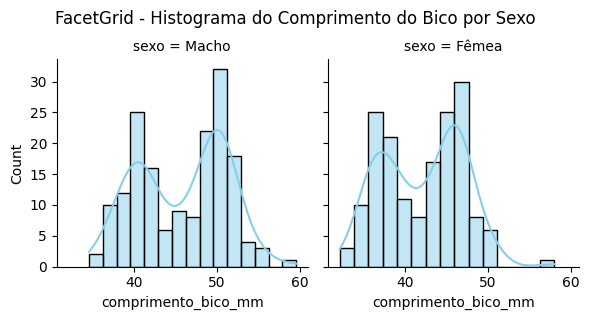

In [97]:
# Gráfico 13 - FacetGrid com Histograma por Sexo
g = sns.FacetGrid(df, col="sexo")
g.map(sns.histplot, "comprimento_bico_mm", bins=15, kde=True, color="skyblue")
g.fig.suptitle("FacetGrid - Histograma do Comprimento do Bico por Sexo", y=1.05)
plt.show()

# 🧩 FacetGrid - Histograma do Comprimento do Bico por Sexo

O gráfico apresentado utiliza a **técnica de FacetGrid** do Seaborn, combinando histogramas com curvas KDE (estimativas de densidade). Isso permite **comparar a distribuição de uma variável contínua (comprimento do bico)** de acordo com diferentes **categorias (sexo)**.

---

## 🎯 O que é um FacetGrid?

O **FacetGrid** divide o conjunto de dados em **subgráficos (facetas)** com base em uma ou mais variáveis categóricas. Neste caso, a variável categórica é o `sexo`, dividindo o gráfico em dois painéis:

- `sexo = Macho` (esquerda)
- `sexo = Fêmea` (direita)

---

## 📈 Como interpretar cada parte?

### 🧮 Eixo X (`comprimento_bico_mm`)
- Representa o **valor do comprimento do bico**, medido em milímetros (mm).
- Os valores variam aproximadamente de **30 mm a 60 mm**.

### 📊 Eixo Y (`Count`)
- Indica a **frequência absoluta**: quantas observações (pingüins) possuem bicos com comprimentos em determinada faixa (bin).

---

## 🔍 O que os elementos mostram?

| Elemento                     | Significado                                                                 |
|-----------------------------|------------------------------------------------------------------------------|
| 📊 Barras                    | Mostram o **número de indivíduos** com comprimento de bico em cada faixa    |
| 🔵 Curva azul (KDE)          | Representa uma **estimativa suave da densidade** da distribuição            |
| ➗ Divisão por sexo           | Permite **comparar machos e fêmeas lado a lado**, observando padrões distintos |
| 📐 Altura das barras         | Indica a **concentração de dados** em determinadas faixas                   |

---

## 📊 Observações importantes

- **Machos** tendem a ter uma concentração mais visível entre **48–52 mm**, com uma distribuição mais picuda.
- **Fêmeas** mostram picos distribuídos em múltiplas faixas, com menor densidade após 50 mm.
- A **forma da curva KDE** sugere se os dados estão bem distribuídos, concentrados ou se há múltiplas “modas” (picos).

---

## ✅ Quando usar um FacetGrid?

| Cenário 🧪                            | Utilidade 🎯                                               |
|-------------------------------------|------------------------------------------------------------|
| Comparar distribuições por categoria| Visualizar como uma variável numérica se comporta em grupos |
| 📊 Análise de grupos separados      | FacetGrid cria uma visualização limpa e comparativa        |
| Detectar diferenças de tendência    | Avalia se grupos têm médias, dispersões ou modas distintas |

---

## 💡 Conclusão

- O **FacetGrid** é uma ferramenta poderosa para **comparações lado a lado**.
- Combina a **clareza de histogramas** com a **fluidez das curvas de densidade (KDE)**.
- Ideal para **análises exploratórias iniciais**, especialmente quando se deseja observar diferenças entre subgrupos.

> ✨ Uma forma visual e clara de comparar **distribuições de variáveis contínuas** entre categorias!



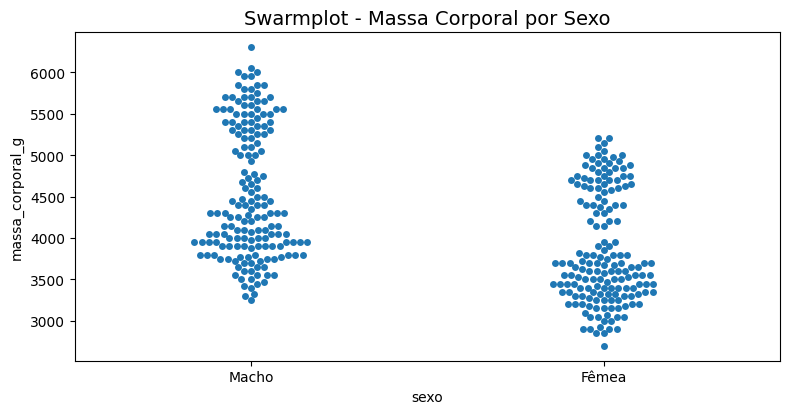

In [98]:
# Gráfico 14 – Swarmplot - Massa Corporal por Sexo
fig, ax = plt.subplots(figsize=(8, 5))
sns.swarmplot(data=df, x='sexo', y='massa_corporal_g', ax=ax)
ax.set_title("Swarmplot - Massa Corporal por Sexo", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🐝 Swarmplot - Massa Corporal por Sexo

O **swarmplot** é uma variação do **stripplot** que **organiza os pontos de forma que eles não se sobreponham**, criando uma visualização clara da **distribuição individual dos dados** dentro de categorias.

---

## 📊 Interpretação Geral

Este gráfico mostra a **massa corporal (em gramas)** dos pinguins, separada por **sexo** (`Macho` e `Fêmea`).

---

## 🧭 Entendendo os Eixos

- **Eixo X** (`sexo`) ➡️ representa a **categoria**, ou seja, os dois grupos: `Macho` e `Fêmea`.

- **Eixo Y** (`massa_corporal_g`) ➡️ representa a **massa corporal** de cada pinguim, medida em **gramas**. Os valores vão de aproximadamente **3000g a 6300g**.

---

## 🔵 Cada ponto azul representa:

- **Um pinguim único**.
- A **posição no eixo Y** mostra a **massa corporal** dele.
- A **posição no eixo X** indica se ele é `Macho` ou `Fêmea`.
- Os pontos são **organizados horizontalmente (espalhados com simetria)** para evitar sobreposição e facilitar a leitura.

---

## 🧠 O que podemos concluir?

| Observação 👀 | Interpretação 📌 |
|--------------|------------------|
| `Machos` tendem a ter massas mais elevadas | Os pontos estão mais concentrados entre 4000g e 6000g. |
| `Fêmeas` têm massas corporais mais baixas em média | A maioria dos pontos está entre 3000g e 4800g. |
| A distribuição é **visualmente distinta** entre os dois sexos | Isso pode indicar **dimorfismo sexual** na espécie. |

---

## 🚀 Para que serve esse gráfico?

| Utilidade 💡 | Explicação |
|-------------|------------|
| 📍 Visualizar todos os valores individuais com clareza |
| 📈 Detectar padrões ou diferenças entre categorias |
| 🧬 Analisar dispersão de dados categorizados |
| 🔎 Detectar presença de grupos densos, valores extremos ou falhas |

---

## 🔄 Comparação com outros gráficos

| Gráfico 🧰 | Diferença ✨ |
|-----------|-------------|
| **Stripplot** | Pontos podem se sobrepor. |
| **Boxplot** | Mostra mediana e quartis, mas não os pontos individuais. |
| **Violin plot** | Mostra densidade, mas não os pontos reais. |
| **Swarmplot** ✅ | Mostra **cada dado individual**, sem sobreposição! |

---

## 📝 Conclusão

O **Swarmplot** é ideal para mostrar **cada ponto da amostra** sem perder legibilidade. É ótimo para comparar categorias e verificar a **distribuição exata** de observações dentro de grupos.

> 🌟 Dica: em conjuntos de dados muito grandes, pode ficar pesado — então use com moderação quando houver milhares de pontos!



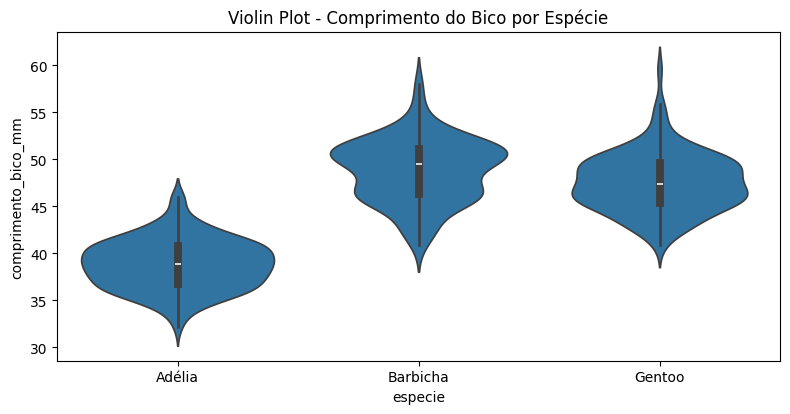

In [99]:
# Gráfico 15 - Violin Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(data=df, x='especie', y='comprimento_bico_mm', ax=ax)
ax.set_title("Violin Plot - Comprimento do Bico por Espécie")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🎻 Violin Plot - Comprimento do Bico por Espécie

O **violin plot** é uma combinação poderosa entre **boxplot** e **gráfico de densidade**. Ele mostra **como os dados estão distribuídos**, além de **destacar mediana, quartis e padrões de densidade**. Este gráfico é excelente para **comparar distribuições entre diferentes categorias**, como neste exemplo com as espécies de pinguins.

---

## 🧭 Eixos do Gráfico

- **Eixo X (`especie`)**: representa as categorias da variável **especie**, ou seja, os grupos comparados: `Adélia`, `Barbicha` e `Gentoo`.
- **Eixo Y (`comprimento_bico_mm`)**: valores numéricos do **comprimento do bico**, variando de aproximadamente **30 mm a 65 mm**.

---

## 🧠 Como interpretar o violin plot?

Cada “violino” (forma simétrica) representa a **distribuição dos dados** de uma categoria. Vamos entender os elementos:

### 🎻 Formato do violino
- Representa a **estimativa de densidade de probabilidade** (via KDE – Kernel Density Estimation).
- Quanto **mais largo** o violino em certa altura do eixo Y, **maior a concentração de dados** naquela faixa de valor.
- Regiões mais estreitas indicam **pouca frequência** de dados.

### 📦 Faixa central escura (boxplot embutido)
- A linha branca ao centro é a **mediana** (50% dos dados).
- A área grossa escura vertical representa o **intervalo interquartil (Q1 a Q3)**.
- As "pontas" (topo e base) da barra mostram os quartis → ajudam a ver onde os dados estão mais dispersos ou concentrados.

---

## 📌 Interpretação por espécie

### 🐧 Adélia
- Curva mais larga entre **36–40 mm**, indicando concentração nessa faixa.
- Mediana próxima de **39 mm**.
- Distribuição mais **simétrica e compacta**.

### 🐧 Barbicha
- Curva bem larga entre **47–52 mm**, indicando maior densidade de valores nessa faixa.
- Mediana mais alta, cerca de **50 mm**.
- Distribuição mais **concentrada no topo** (padrão diferente da Adélia).

### 🐧 Gentoo
- Faixa de maior densidade parecida com a Barbicha, entre **45–50 mm**.
- Mediana próxima de **48 mm**.
- Possível **leve assimetria**, mas semelhante à Barbicha.

---

## ✅ Para que serve o violin plot?

| Objetivo | Benefício |
|----------|-----------|
| 🎯 Visualizar forma da distribuição | Mostra se os dados são simétricos, multimodais, achatados, etc. |
| 📦 Comparar mediana e quartis entre categorias | Permite verificar diferenças de tendência central |
| 🔍 Analisar densidade de dados | Ajuda a ver onde os valores estão mais concentrados |
| 🆚 Melhor que o boxplot quando se quer ver a "forma" da distribuição | Especialmente útil com amostras maiores ou padrões complexos |

---

## 🧪 Conclusão

O violin plot é ideal quando você quer **entender a distribuição dos dados para cada grupo**, com mais detalhes do que o boxplot sozinho oferece. Ele une o melhor dos dois mundos: **resumo estatístico (boxplot)** e **forma da distribuição (KDE)**.

Neste gráfico, fica evidente que as espécies têm **padrões distintos de comprimento de bico**, tanto em **mediana quanto na concentração de valores** — o que pode ser útil para análises biológicas ou classificações.

Use violin plots sempre que quiser explorar **diferenças na distribuição de variáveis numéricas entre categorias**! 🎓


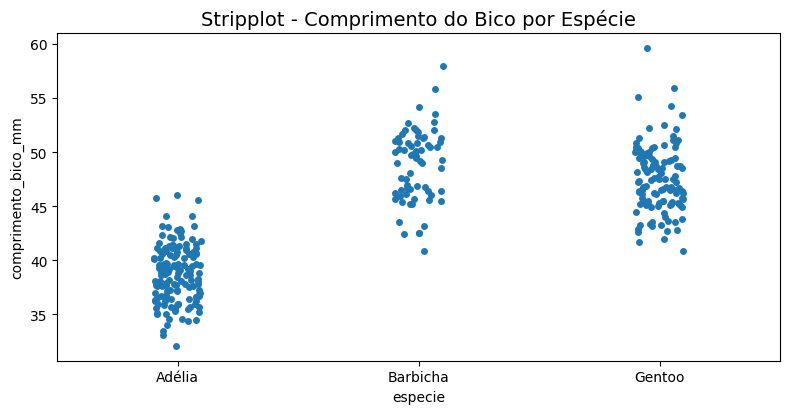

In [100]:
# Gráfico 16 – Stripplot - Comprimento do Bico por Espécie
fig, ax = plt.subplots(figsize=(8, 5))
sns.stripplot(data=df, x='especie', y='comprimento_bico_mm', ax=ax, jitter=True)
ax.set_title("Stripplot - Comprimento do Bico por Espécie", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 🎯 Stripplot - Comprimento do Bico por Espécie

O **stripplot** é uma excelente forma de visualizar a **distribuição individual de pontos** dentro de uma ou mais categorias. É útil especialmente para **dados categóricos no eixo X** e **valores numéricos no eixo Y**.

---

## 🧭 Entendendo os Eixos

- **Eixo X (horizontal)**:
  - Representa a variável **categórica** `especie`, contendo três categorias:
    - `Adélia`
    - `Barbicha`
    - `Gentoo`
  - Cada categoria agrupa os pontos verticalmente para facilitar a comparação.

- **Eixo Y (vertical)**:
  - Representa os valores **numéricos contínuos** de `comprimento_bico_mm`, ou seja, o **comprimento do bico** em milímetros.

---

## 🔵 O que cada ponto significa?

- Cada **ponto azul** é **um pinguim do dataset**.
- A posição do ponto no **eixo Y** mostra o valor do comprimento do bico daquele pinguim.
- A posição no **eixo X** indica a qual **espécie** ele pertence.
- Não há sobreposição horizontal: os pontos estão empilhados verticalmente em uma única linha por categoria.

---

## 💡 O que esse gráfico revela?

- Podemos **comparar a dispersão e a concentração** dos dados de comprimento de bico para cada espécie:
  - `Adélia`: concentração entre ~35mm e 45mm
  - `Barbicha`: faixa maior, variando de ~42mm a ~58mm
  - `Gentoo`: valores parecidos com Barbicha, mas um pouco mais compactos

---

## 🧠 Para que serve esse gráfico?

| Utilidade 💡 | Explicação |
|-------------|------------|
| 📍 Analisar a distribuição de cada ponto individualmente |
| 🧬 Detectar **aglomerados**, **lacunas** ou **valores extremos** |
| 📈 Comparar variabilidade entre grupos categóricos |
| 🔎 Ideal para **amostras pequenas a médias** (senão há muita sobreposição!) |

---

## ✅ Dicas de leitura

- Se os pontos estiverem todos concentrados, indica **baixa variabilidade**.
- Se estiverem muito espalhados verticalmente, há **alta dispersão** dos valores.
- Se você perceber “espaços vazios”, pode ser um indicativo de **valores ausentes em certas faixas**.

---

## 🚀 Diferença para outros gráficos

- 🔄 *Comparado ao boxplot*: o stripplot **mostra todos os pontos**, enquanto o boxplot resume com quartis e mediana.
- 🎻 *Comparado ao violin plot*: o stripplot mostra os pontos, já o violin mostra a densidade dos dados.

---

## 🧪 Conclusão

O **stripplot** é excelente para visualizações rápidas e intuitivas sobre **distribuições individuais**. Use-o quando quiser manter cada observação visível e analisar como os dados se distribuem entre grupos.

> ✨ Combine com `jitter=True` se quiser espalhar horizontalmente e evitar sobreposição!


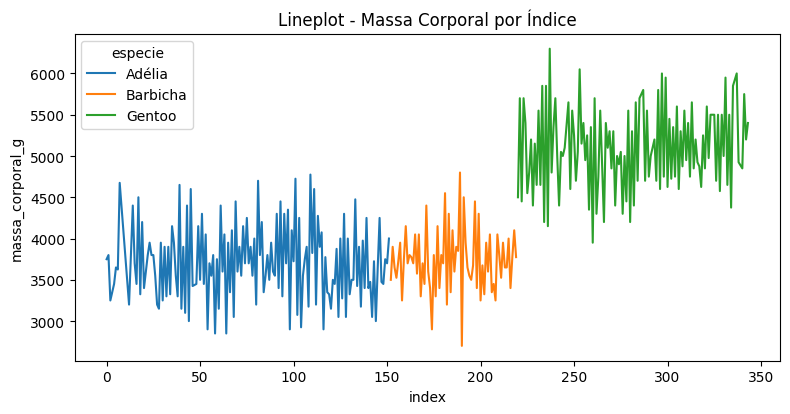

In [101]:
# Gráfico 17 - Lineplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(data=df.reset_index(), x='index', y='massa_corporal_g', hue='especie', ax=ax)
ax.set_title("Lineplot - Massa Corporal por Índice")
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📉 Lineplot - Massa Corporal por Índice

O **lineplot** (gráfico de linha) é uma ferramenta muito usada para visualizar **tendências, variações e padrões ao longo de um eixo contínuo**, como o tempo, índice ou qualquer sequência ordenada. Neste caso, ele mostra a variação da **massa corporal dos pinguins** ao longo dos seus **índices no dataset**.

---

## 🧭 Eixos do gráfico

- **Eixo X (`index`)**: representa a posição sequencial (índice) de cada pinguim no dataset. Não é uma medida do tempo, mas **ajuda a organizar os dados em ordem**.
- **Eixo Y (`massa_corporal_g`)**: mostra a **massa corporal de cada pinguim em gramas (g)**. Os valores vão de cerca de 2.800g até 6.300g.

---

## 🎨 Cores e Legenda

- Cada linha colorida representa uma **espécie diferente de pinguim**:
  - 🔵 Azul → Adélia
  - 🟠 Laranja → Barbicha
  - 🟢 Verde → Gentoo

A cor da linha permite **comparar visualmente** como a massa corporal se comporta em cada grupo.

---

## 🔍 Como interpretar o gráfico?

### 🔄 1. **Variações e padrões**
- As linhas sobem e descem, o que indica **flutuações na massa corporal** entre os pinguins daquela espécie.
- Isso ajuda a entender a **dispersão dos dados dentro de cada grupo**.

### 📏 2. **Comparações entre espécies**
- Pinguins da espécie **Gentoo** (linha verde) possuem, em média, **massa corporal bem mais alta** que as outras espécies.
- Os pinguins **Adélia** e **Barbicha** estão em faixas mais baixas de massa.

### 📊 3. **Variações internas**
- A **espécie Adélia** tem bastante variação — a linha azul sobe e desce com frequência.
- A **Barbicha** mostra certa estabilidade, com menor amplitude vertical.
- A **Gentoo**, apesar de massas maiores, também tem flutuações perceptíveis.

---

## ✅ Para que serve um Lineplot?

| Objetivo | Benefício |
|----------|-----------|
| 🧠 Visualizar mudanças ao longo de uma sequência | Excelente para identificar tendências |
| 📈 Comparar múltiplas categorias (cores diferentes) | Mostra variações entre grupos |
| 🚨 Detectar flutuações anormais ou padrões repetitivos | Útil para análises temporais ou ordenadas |
| 🔍 Observar comportamento individual ou agregado | Mesmo sem datas, o índice já oferece uma boa visão |

---

## 📝 Conclusão

Este gráfico mostra que:
- A **massa corporal** varia entre os indivíduos de cada espécie.
- A espécie **Gentoo** é, em geral, **mais pesada**.
- O lineplot é útil para **visualizar padrões de variação**, mesmo sem datas, apenas com uma sequência (índice).

Use lineplots sempre que quiser responder a perguntas como:
- “Existe uma tendência de aumento ou queda?” 📉📈  
- “Esse grupo se comporta diferente dos outros?” 🧬  
- “Existem flutuações incomuns ou padrões repetitivos?” 🔁


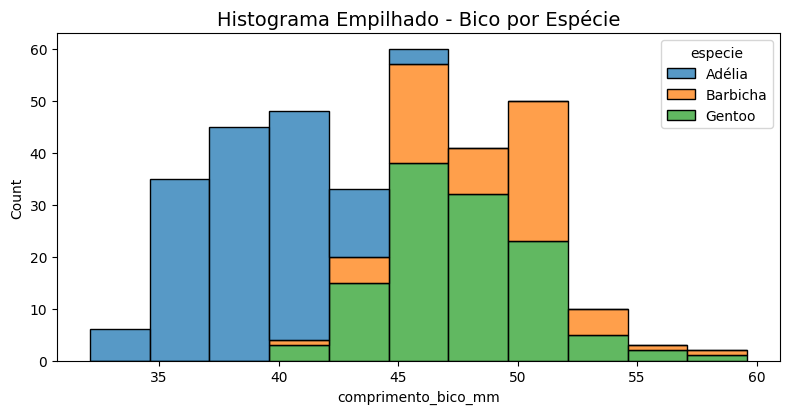

In [102]:
# Gráfico 18 – Histograma Empilhado - Bico por Espécie
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(data=df, x='comprimento_bico_mm', hue='especie', multiple='stack', ax=ax)
ax.set_title("Histograma Empilhado - Bico por Espécie", fontsize=14)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

# 📊 Histograma Empilhado – Comprimento do Bico por Espécie

Este gráfico representa um **histograma empilhado**, onde a distribuição do **comprimento do bico dos pinguins** está dividida e colorida por **espécie**.

---

## 🖼️ Elementos do Gráfico

### 🧭 Eixos:

- **Eixo X**: `comprimento_bico_mm` → Representa os intervalos (bins) dos comprimentos dos bicos, em milímetros.
- **Eixo Y**: `Count` → Indica a quantidade de pinguins em cada faixa de comprimento de bico.

---

## 🧱 Como funciona um histograma empilhado?

- 🔢 Os dados são agrupados em **intervalos de valores (bins)** ao longo do eixo X.
- 🎨 Cada bin é **empilhado verticalmente** com retângulos coloridos, onde:
  - Azul → Espécie **Adélia**
  - Laranja → Espécie **Barbicha**
  - Verde → Espécie **Gentoo**

A **altura total da barra** mostra o número total de observações naquele intervalo de comprimento, e a **cor mostra a contribuição de cada espécie** naquele total.

---

## 🔍 Interpretações úteis:

- 📌 **Onde há sobreposição de espécies**, você pode observar **diversidade naquela faixa**.
- 🧬 **Distribuição**:
  - A espécie **Adélia** concentra-se em comprimentos de bico menores (~33 a 44 mm).
  - A **Gentoo** tem comprimentos maiores (~43 a 55 mm).
  - A **Barbicha** tem uma sobreposição ampla com Gentoo, mas com maior frequência de 45 a 52 mm.

---

## 🎯 Para que serve?

| Objetivo 🎯                         | Utilidade 💡                                                                 |
|------------------------------------|------------------------------------------------------------------------------|
| 📊 Comparar distribuições          | Ver como diferentes grupos (espécies) se distribuem em uma variável contínua |
| 🧠 Avaliar sobreposição de dados   | Identificar onde espécies têm características semelhantes                    |
| 🔍 Identificar padrões de grupos   | Visualizar onde uma espécie predomina sobre outras                          |
| 📦 Mostrar composição dos dados    | Cada bin mostra o total e a fração por categoria                            |

---

## 🧠 Dicas para leitura

- 📏 **Barras altas** indicam muitos indivíduos com aquele intervalo de bico.
- 🎯 **Barras de uma cor só** sugerem domínio de uma espécie naquela faixa.
- 📶 **Barras com várias cores** indicam **sobreposição ou mistura** entre espécies.

---

## 📘 Comparações com outros gráficos

| Gráfico 📊        | Diferença Principal 📌                                                                 |
|------------------|----------------------------------------------------------------------------------------|
| Histograma normal| Não separa por categorias, mostra apenas a distribuição total                         |
| Barplot          | Usa médias ou somas por categoria, não mostra distribuição contínua                   |
| KDE Plot         | Estima a densidade suave, mas não mostra quantidade absoluta                          |

---

## ✅ Conclusão

O **histograma empilhado** é perfeito para análises exploratórias onde você quer **ver a distribuição de uma variável contínua** (como o comprimento do bico) **separada por grupos categóricos** (como espécie). Ele permite:

- 📊 Comparação clara entre grupos
- 📦 Visualização da distribuição geral
- 🔍 Detecção de sobreposições e padrões

> Use este gráfico quando quiser **entender a composição de diferentes grupos em uma variável contínua** com muita clareza! 🎯
